In [1]:
from IPython.display import display

<p style="font-size: 25px; line-height: 135%;}">
<b>Bike Sharing: Predicción de Demanda Horaria</b>
</p>

<p style="font-size: 20px; line-height: 135%;}">
<b>Pregunta a</b>
</p>

In [2]:
import pandas as pd
import numpy as np
dftrain = pd.read_csv('bike_sharing_train.csv')
dfval = pd.read_csv('bike_sharing_val.csv')
dftest = pd.read_csv('bike_sharing_test.csv')
ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)
df = pd.concat([dftrain,dfval,dftest])
print('\nSummary - dataframe completo:\n')
#display(df.head())

display(df.describe())

df.info()
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])

#display(df['season'])


Summary - dataframe completo:



,Unnamed: 0,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,5442.500000,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,3142.661849,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2721.250000,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,5442.500000,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,8163.750000,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,10885.000000,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 2146
Data columns (total 13 columns):
Unnamed: 0    10886 non-null int64
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(9), object(1)
memory usage: 1.2+ MB


<p style="font-size: 18px; line-height: 135%;}">
<b>a)</b>
El dataset presente tiene 10886 entradas, cada una no nula. Dentro de los atributos están los categóricos como 
<br><br>
Season: Toma valores entre 1, 2, 3 y 4 para indicar primavera, verano, otoño y invierno <br>
Holiday: 0 o 1 si es que es un día festivo <br>
Working day: 0 o 1 Si es un día de trabajo normal <br>
Weather: Toma valores entre 1, 2, 3 y 4 para indicar el clima del día <br>

El resto son variables que pertenecen a los reales o enteros, se puede ver más detalles al ver la salida de ``df.info()``
</p>

<p style="font-size: 20px; line-height: 135%;}">
<b>Pregunta b</b>
</p>

/home/fco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


SCORE TEST=0.703388
KAGG EVAL TRAIN =0.028516
KAGG EVAL TEST =0.574239


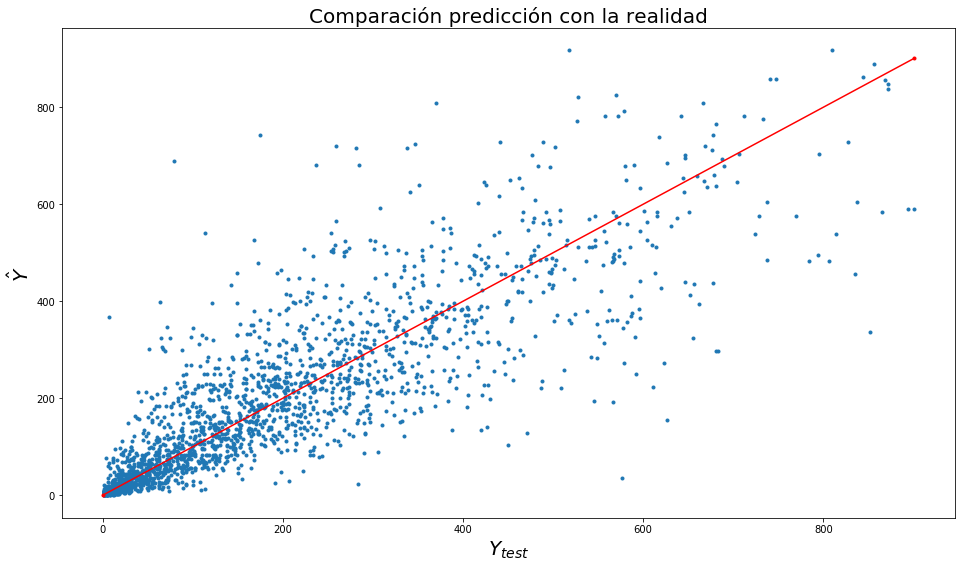

In [3]:
from sklearn.tree import DecisionTreeRegressor as Tree
import matplotlib.pyplot as plt
def eval_bikemodel(y_predict,y_true):
    diff = np.log(y_predict+1.0) - np.log(y_true+1.0)
    return np.sqrt(np.sum(np.square(diff))/len(y_predict))

Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour']]
Ydf=df.ix[:,'count']
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

#Se entrena el árbol con el entrenamiento
model = Tree(random_state=0)
model.fit(X_train,Y_train)
score_test = model.score(X_test,Y_test)
print ("SCORE TEST=%f"%score_test)

#Se calculan predicciones 
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

#Se procede a evaluar la métrica del error
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)

#Se procede a mostrar el error y gráficar los puntos
print ("KAGG EVAL TRAIN =%f"%kagg_train)
print ("KAGG EVAL TEST =%f"%kagg_test)
plt.figure(figsize = (16, 9))
plt.plot(Y_test,Y_pred_test,'.')
plt.plot([0, max(Y_test)], [0, max(Y_test)], ".-r")
plt.title('Comparación predicción con la realidad', fontsize=20)
plt.xlabel("$Y_{test}$", fontsize=20)
plt.ylabel("$\^{Y}$", fontsize=20)
plt.show()

<p style="font-size: 18px; line-height: 135%;}">
<b>b)</b>
Al hacer el gráfico de $Y_{test}$ vs $\hat{Y}$ se aprecia que en la medida que las predicciones son más cercanas a la realidad se situan en torno a la diagonal de la forma $Y = 1\cdot X$.
</p>

<p style="font-size: 20px; line-height: 135%;}">
<b>Pregunta c</b>
</p>

In [4]:
menor = float("inf")

#Se empieza a buscar la profundidad que produzca el menor error posible
for profundidad in range(1, 100):
    model = Tree(random_state=0,max_depth=profundidad)
    model.fit(X_train,Y_train)
    Y_pred_val = model.predict(X_val)
    kagg_val = eval_bikemodel(Y_pred_val,Y_val)
    
    if kagg_val < menor:
        menor = kagg_val
        mejorProfundidad = profundidad
    
print ("La mejor profundiad fue", mejorProfundidad)
model = Tree(random_state = 0, max_depth = mejorProfundidad)
model.fit(X_train, Y_train)
Y_pred_test = model.predict(X_test)
error_maxProfundidad = eval_bikemodel(Y_pred_test,Y_test)
print ("KAGG EVAL TEST =%f"%error_maxProfundidad)
print ("La diferencia de los errores es de", kagg_test - error_maxProfundidad)

La mejor profundiad fue 10
KAGG EVAL TEST =0.516396
La diferencia de los errores es de 0.0578424532371


<p style="font-size: 18px; line-height: 135%;}">
<b>c)</b>
Al correr el código se obtiene que la profundidad óptima es la señalada en la salida. Ajustar la profundidad maxima protege al árbol del sobre ajuste dado que no permite que se generen regiones con reglas tán especificas y así se logra mantener el poder de generalización de la máquina. Al ver el resultado efectivamente se redujo el error de la máquina aproximadamente en 5%.
</p>

<p style="font-size: 20px; line-height: 135%;}">
<b>Pregunta d</b>
</p>

In [5]:
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek#0:lunes,6:domingo
df['cday'] = pd.to_numeric(df['cday'])

Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday']]
Ydf=df.ix[:,'count']

#Se recalcula el entrenamiento, validación y test
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

from sklearn.preprocessing import StandardScaler
stdX = StandardScaler(with_mean=True, with_std=True)
stdY = StandardScaler(with_mean=True, with_std=True)

stdX.fit(X_train)
stdY.fit(Y_train.reshape(-1, 1))

X_train = stdX.transform(X_train)
X_val = stdX.transform(X_val)
X_test = stdX.transform(X_test)

Y_train = stdY.transform(Y_train.reshape(-1, 1))
#Y_val = stdY.transform(Y_val.reshape(-1, 1))
#Y_test = stdY.transform(Y_test.reshape(-1, 1))


#Se procede a entrenar un árbol
menor = float("inf")

#Se empieza a buscar la profundidad que produzca el menor error posible
for profundidad in range(1, 100):
    model = Tree(random_state=0,max_depth=profundidad)
    model.fit(X_train,Y_train)
    Y_pred_val = model.predict(X_val)
    Y_pred_val = stdY.inverse_transform(Y_pred_val)
    kagg_val = eval_bikemodel(Y_pred_val,Y_val)
    
    if kagg_val < menor:
        menor = kagg_val
        mejorProfundidad = profundidad
    
print ("La mejor profundiad fue", mejorProfundidad)
model = Tree(random_state = 0, max_depth = mejorProfundidad)
model.fit(X_train, Y_train)
Y_pred_test = model.predict(X_test)
Y_pred_test = stdY.inverse_transform(Y_pred_test)
error_maxProfundidad = eval_bikemodel(Y_pred_test,Y_test)
print ("KAGG EVAL TEST =%f"%error_maxProfundidad)

/home/fco/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


La mejor profundiad fue 10
KAGG EVAL TEST =0.505296


<p style="font-size: 20px; line-height: 135%;}">
<b>Pregunta e</b>
</p>

In [6]:
#load dataframes as before ...
df = pd.concat([dftrain,dfval,dftest])
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek
df['hour'] = pd.to_numeric(df['hour'])
df['cday'] = pd.to_numeric(df['cday'])
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday']]
 #PASO IMPORTANTE MAS ABAJO ...
Xdf = pd.get_dummies(Xdf,columns=['season', 'weather','hour','cday'])
Ydf=df.ix[:,'count']

#Se recalcula el entrenamiento, validación y test
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

#Se procede a estandarizar el X e Y
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
scalerY = StandardScaler()

scalerX.fit(X_train)
scalerY.fit(Y_train.reshape(-1, 1))

X_train = scalerX.transform(X_train)
X_val = scalerX.transform(X_val)
X_test = scalerX.transform(X_test)
Y_train = scalerY.transform(Y_train.reshape(-1, 1))

Y_train = Y_train.reshape(Y_train.shape[0])

#Se entrena la SVM y se realizan las predicciones
from sklearn.svm import SVR
model = SVR()
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

Y_pred_train = scalerY.inverse_transform(Y_pred_train)
Y_pred_val = scalerY.inverse_transform(Y_pred_val)
Y_pred_test = scalerY.inverse_transform(Y_pred_test)

def parche(x):
    if x<=0:
        return 0
    return x

Y_pred_train = np.asarray([parche(i) for i in Y_pred_train])
Y_pred_val = np.asarray([parche(i) for i in Y_pred_val])
Y_pred_test = np.asarray([parche(i) for i in Y_pred_test])

Y_train = scalerY.inverse_transform(Y_train)
    
#Se procede a evaluar la métrica del error
kagg_train = eval_bikemodel(Y_pred_train, Y_train)
kagg_val = eval_bikemodel(Y_pred_val, Y_val)
kagg_test = eval_bikemodel(Y_pred_test, Y_test)

#Se procede a mostrar el error y gráficar los puntos
print ("KAGG EVAL TRAIN =%f"%kagg_train)
print ("KAGG EVAL VAL =%f"%kagg_val)
print ("KAGG EVAL TEST =%f"%kagg_test)

/home/fco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
/home/fco/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


KAGG EVAL TRAIN =0.586750
KAGG EVAL VAL =0.649955
KAGG EVAL TEST =0.686009


<p style="font-size: 20px; line-height: 135%;}">
<b>Pregunta f</b>
</p>